In [1]:
from qutip import *

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

## with decay

In [4]:
# experimental parameters from SI
w_q = 2 * np.pi * 7850.3    # MHz
chi = 2 * np.pi * 9.4    # MHz
w_c = 2 * np.pi * 9274.7    # MHz
K =  2 * np.pi * 0.325    # MHz
kappa = 2 * np.pi * 10e-3    # MHz

total_evolution_time = 8    # us
total_steps = 80000    # the step size of evolution time will be total_evolution_time/total_steps
N = 15    # number of cavity fock states, this should be large enough

psi0 = coherent(N, 2)    # initial coherent state
a = destroy(N)

H = - K/2 * a.dag() * a * a.dag() * a    # Kerr Hamiltonian

tlist_1 = np.linspace(0, total_evolution_time, total_steps)    # time list for simulation
output_1 = mesolve(H, psi0, tlist_1, [np.sqrt(kappa)*a])    # decay added by the 4th argument

## no decay

In [18]:
# experimental parameters from SI
w_q = 2 * np.pi * 7850.3
chi = 2 * np.pi * 9.4
w_c = 2 * np.pi * 9274.7
K =  2 * np.pi * 0.325
kappa = 2 * np.pi * 10e-3

total_evolution_time = 8    # us
total_steps = 80000    # the step size of evolution time will be total_evolution_time/total_steps
N = 15    # number of cavity fock states, this should be large enough

psi0 = coherent(N, 2)    # initial coherent state
a = destroy(N)

H = - K/2 * a.dag() * a * a.dag() * a    # Kerr Hamiltonian

tlist_2 = np.linspace(0, total_evolution_time, total_steps)    # time list for simulation
output_2 = mesolve(H, psi0, tlist_2)

# For movie & GIF

## With decay

In [35]:
tot_frames = 100    # total frame number spanning the whole evolution time range
for index_frame in np.arange(0, tot_frames):
    index_output_data = int(index_frame * total_steps/tot_frames)
    time_point = total_evolution_time * 1e3 * index_frame/tot_frames    # ns
    
    xvec = np.linspace(-3, 3, 500)    # range for Q function
    Q_coherent = qfunc(output_1.states[index_output_data], xvec, xvec, g = 2)    
    # In qfunc, g is the scaling factor for a = 0.5 * g * (x + iy)
    
    fig = plt.figure(figsize=(5, 4))
    plt.contourf(xvec, xvec, Q_coherent, 100)
    plt.colorbar()
    plt.text(-2.5, 2.5, 't = %5d ns'% time_point, horizontalalignment='left',\
             verticalalignment='center', fontsize=12, color='white')
    plt.savefig('./frames_Q/withdecay_%04d.png'%(index_frame), transparent=True,
            dpi=100, bbox_inches='tight')
    plt.close(fig)

In [36]:
tot_frames = 100    # total frame number spanning the whole evolution time range
for index_frame in np.arange(0, tot_frames):
    index_output_data = int(index_frame * total_steps/tot_frames)
    time_point = total_evolution_time * 1e3 * index_frame/tot_frames    # ns
    
    xvec = np.linspace(-3, 3, 500)    # range for Wigner function
    Wigner_coherent = wigner(output_1.states[index_output_data], xvec, xvec, g = 2)
    # In wigner, g is the scaling factor for a = 0.5 * g * (x + iy)
    
    fig = plt.figure(figsize=(5, 4))
    plt.contourf(xvec, xvec, Wigner_coherent, 100)
    plt.colorbar()
    plt.text(-2.5, 2.5, 't = %5d ns'% time_point, horizontalalignment='left',\
             verticalalignment='center', fontsize=12, color='white')
    plt.savefig('./frames_wigner/withdecay_%04d.png'%(index_frame), transparent=True,
            dpi=100, bbox_inches='tight')
    plt.close(fig)

## no decay

In [29]:
tot_frames = 100    # total frame number spanning the whole evolution time range
for index_frame in np.arange(0, tot_frames):
    index_output_data = int(index_frame * total_steps/tot_frames)
    time_point = total_evolution_time * 1e3 * index_frame/tot_frames    # ns
    
    xvec = np.linspace(-3, 3, 500)    # range for Q function
    Q_coherent = qfunc(output_2.states[index_output_data], xvec, xvec, g = 2)    
    # In qfunc, g is the scaling factor for a = 0.5 * g * (x + iy)
    
    fig = plt.figure(figsize=(5, 4))
    plt.contourf(xvec, xvec, Q_coherent, 100)
    plt.colorbar()
    plt.text(-2.5, 2.5, 't = %5d ns'% time_point, horizontalalignment='left',\
             verticalalignment='center', fontsize=12, color='white')
    plt.savefig('./frames_Q/nodecay_%04d.png'%(index_frame), transparent=True,
            dpi=100, bbox_inches='tight')
    plt.close(fig)

In [30]:
tot_frames = 100    # total frame number spanning the whole evolution time range
for index_frame in np.arange(0, tot_frames):
    index_output_data = int(index_frame * total_steps/tot_frames)
    time_point = total_evolution_time * 1e3 * index_frame/tot_frames    # ns
    
    xvec = np.linspace(-3, 3, 500)    # range for Wigner function
    Wigner_coherent = wigner(output_2.states[index_output_data], xvec, xvec, g = 2)
    # In wigner, g is the scaling factor for a = 0.5 * g * (x + iy)
    
    fig = plt.figure(figsize=(5, 4))
    plt.contourf(xvec, xvec, Wigner_coherent, 100)
    plt.colorbar()
    plt.text(-2.5, 2.5, 't = %5d ns'% time_point, horizontalalignment='left',\
             verticalalignment='center', fontsize=12, color='white')
    plt.savefig('./frames_wigner/nodecay_%04d.png'%(index_frame), transparent=True,
            dpi=100, bbox_inches='tight')
    plt.close(fig)

## generate GIF

## with decay

In [37]:
from PIL import Image, ImageDraw
import glob
fp_in = "./frames_Q/withdecay_*.png"
fp_out = "./movies/Q.gif"
img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=500, loop=0, optimize=False)

In [38]:

fp_in = "./frames_wigner/withdecay_*.png"
fp_out = "./movies/wigner.gif"
img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=500, loop=0, optimize=False)

## no decay

In [31]:
from PIL import Image, ImageDraw
import glob
fp_in = "./frames_Q/nodecay_*.png"
fp_out = "./movies/Q_nodecay.gif"
img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=500, loop=0, optimize=False)

In [32]:

fp_in = "./frames_wigner/nodecay_*.png"
fp_out = "./movies/wigner_nodecay.gif"
img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=500, loop=0, optimize=False)

# For specific time points used in the paper

## with decay

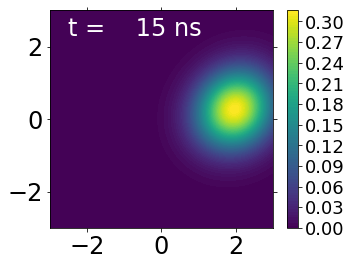

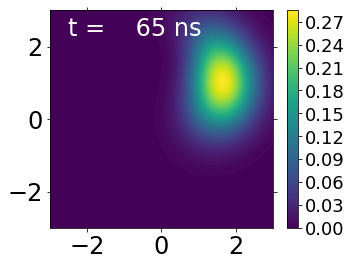

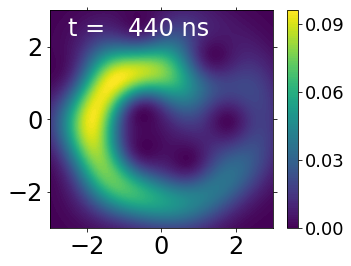

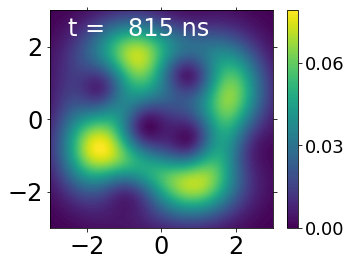

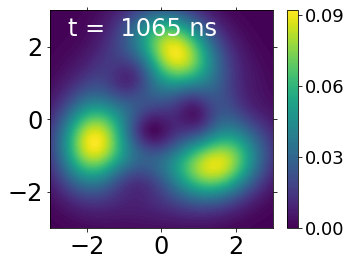

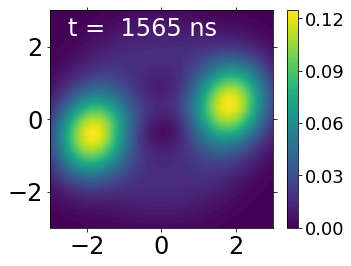

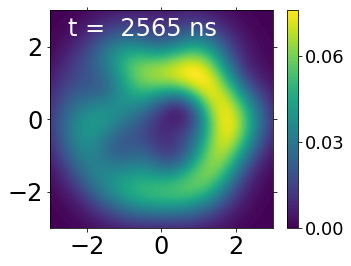

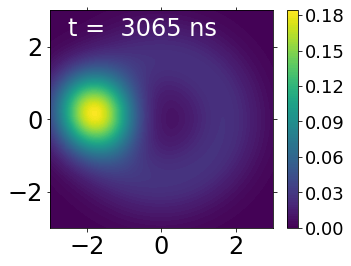

In [59]:
for time_point in [15, 65, 440, 815, 1065, 1565, 2565, 3065]:    # ns, time points in the paper
    # calculate index from the time point
    index_output_data = int(total_steps*time_point/(total_evolution_time*1e3))  
    
    xvec = np.linspace(-3, 3, 500)    # range for Q function
    Q_coherent = qfunc(output_1.states[index_output_data], xvec, xvec, g = 2)
    
    fig = plt.figure(figsize=(5, 4))
    plt.contourf(xvec, xvec, Q_coherent, 100)
    cbar = plt.colorbar(ticks=np.linspace(0, 0.3, 11))
    cbar.ax.tick_params(labelsize=18)
    
    ax = plt.gca()
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')
    plt.xticks([-2,0,2], fontsize= 24)
    plt.yticks([-2,0,2], fontsize= 24)

    plt.text(-2.5, 2.5, 't = %5d ns'% time_point, horizontalalignment='left',verticalalignment='center',\
         fontsize=24, color='white')
    plt.savefig('./paper_fig/Q_%04d.pdf'%time_point, transparent=True, bbox_inches='tight')

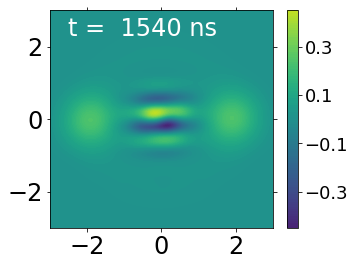

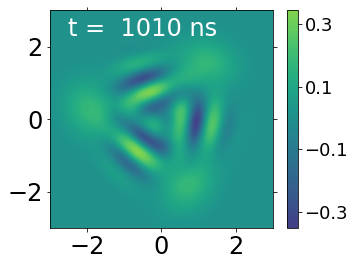

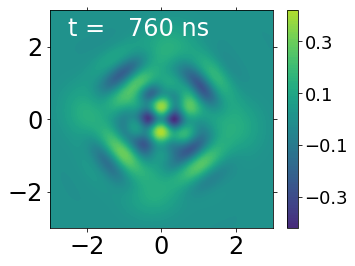

In [60]:
for time_point in [1540, 1010, 760]:    # ns
    # calculate index from the time point
    index_output_data = int(total_steps*time_point/(total_evolution_time*1e3))
    
    xvec = np.linspace(-3, 3, 500)    # range for Wigner function
    Wigner_coherent = wigner(output_1.states[index_output_data], xvec, xvec, g = 2)
    
    fig = plt.figure(figsize=(5, 4))
    plt.contourf(xvec, xvec, Wigner_coherent, 100)
    plt.clim(-0.55,0.55)    # fix color range for all plots
    cbar = plt.colorbar(ticks=[-0.5, -0.3, -0.1, 0.1, 0.3, 0.5])
    cbar.ax.tick_params(labelsize=18)
    
    ax = plt.gca()
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')
    plt.xticks([-2,0,2], fontsize= 24)
    plt.yticks([-2,0,2], fontsize= 24)
    
    plt.text(-2.5, 2.5, 't = %5d ns'% time_point, horizontalalignment='left',verticalalignment='center',\
         fontsize=24, color='white')
    plt.savefig('./paper_fig/W_%04d.pdf'%time_point, transparent=True, bbox_inches='tight')


# no decay

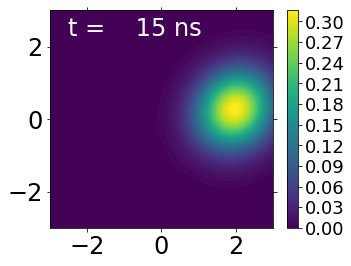

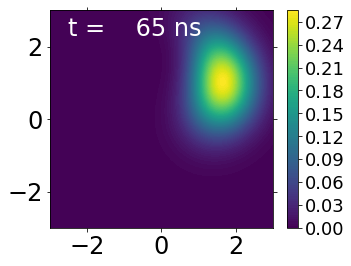

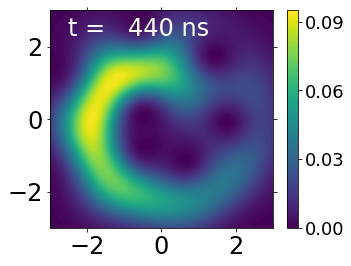

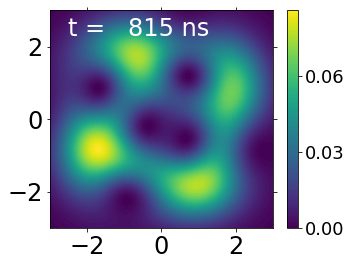

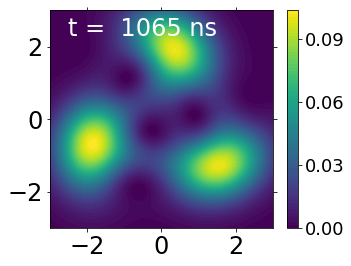

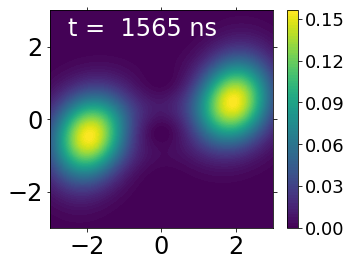

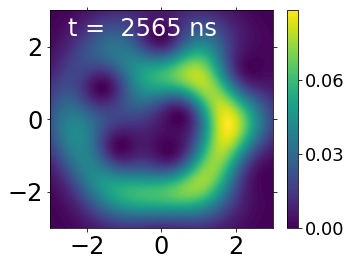

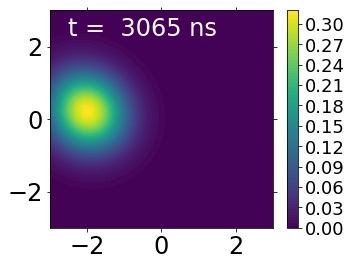

In [57]:
for time_point in [15, 65, 440, 815, 1065, 1565, 2565, 3065]:    # ns
    # calculate index from the time point
    index_output_data = int(total_steps*time_point/(total_evolution_time*1e3))
    
    xvec = np.linspace(-3, 3, 500)    # range for Q function
    Q_coherent = qfunc(output_2.states[index_output_data], xvec, xvec, g = 2)
    
    fig = plt.figure(figsize=(5, 4))
    plt.contourf(xvec, xvec, Q_coherent, 100)
    cbar = plt.colorbar(ticks=np.linspace(0, 0.3, 11))
    cbar.ax.tick_params(labelsize=18)
    
    ax = plt.gca()
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')
    plt.xticks([-2,0,2], fontsize= 24)
    plt.yticks([-2,0,2], fontsize= 24)

    plt.text(-2.5, 2.5, 't = %5d ns'% time_point, horizontalalignment='left',verticalalignment='center',\
         fontsize=24, color='white')
    plt.savefig('./paper_fig/Q_nodecay_%04d.pdf'%time_point, transparent=True, bbox_inches='tight')


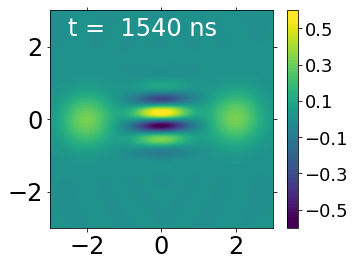

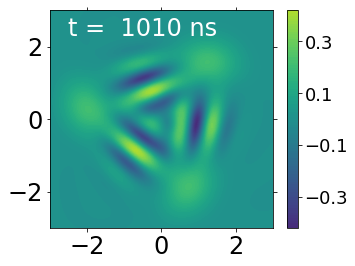

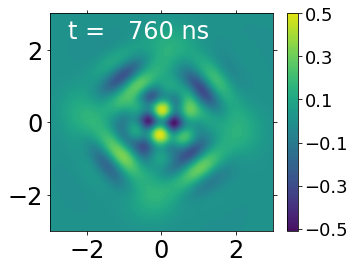

In [55]:
for time_point in [1540, 1010, 760]:    # ns
    # calculate index from the time point
    index_output_data = int(total_steps*time_point/(total_evolution_time*1e3))
    
    xvec = np.linspace(-3, 3, 500)    # range for Wigner function
    Wigner_coherent = wigner(output_2.states[index_output_data], xvec, xvec, g = 2)
    
    fig = plt.figure(figsize=(5, 4))
    plt.contourf(xvec, xvec, Wigner_coherent, 100)
    plt.clim(-0.55,0.55)    # fix color range for all plots
    cbar = plt.colorbar(ticks=[-0.5, -0.3, -0.1, 0.1, 0.3, 0.5])
    cbar.ax.tick_params(labelsize=18)
    
    ax = plt.gca()
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')
    plt.xticks([-2,0,2], fontsize= 24)
    plt.yticks([-2,0,2], fontsize= 24)
    plt.text(-2.5, 2.5, 't = %5d ns'% time_point, horizontalalignment='left',verticalalignment='center',\
         fontsize=24, color='white')
    plt.savefig('./paper_fig/W_nodecay_%04d.pdf'%time_point, transparent=True, bbox_inches='tight')
